Entropy of root node: 0.2983436219957756
Dividing by Weather:
	Information Gain: 0.09765695821978815
Dividing by Temperature:
	Information Gain: 0.021909031052100625
Dividing by Humidity:
	Information Gain: 0.027421125623997122
Dividing by Windy:
	Information Gain: 0.021909031052100625
Maximum Information Gain with Weather

Division of node Rainy
Entropy of root node: 0.24421905028821553
Dividing by Weather:
	Information Gain: 0.0
Dividing by Temperature:
	Information Gain: 0.09370405245622496
Dividing by Humidity:
	Information Gain: 0.24421905028821553
Dividing by Windy:
	Information Gain: 0.036893107080459314
Maximum Information Gain with Humidity

Division of node High
Entropy of root node: 0.0
Division of node Normal
Entropy of root node: 0.0
Division of node Sunny
Entropy of root node: 0.27643459094367495
Dividing by Weather:
	Information Gain: 0.0
Dividing by Temperature:
	Information Gain: 0.07574792716768752
Dividing by Humidity:
	Information Gain: 0.07574792716768752
Dividing 

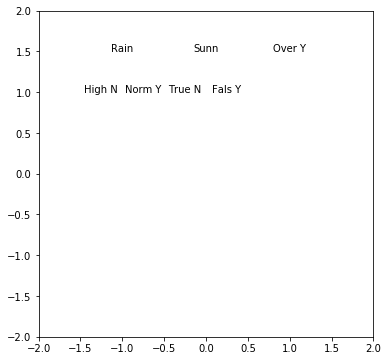

In [171]:
import math
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
import matplotlib.pyplot as plt
# Entropy: -sum(p(x)log(p(x)))

"""
That's just going to waste my whole spring break
"Figure it out" means you're going to force me to do it.
"""

def entropy(listI):
    # 1) Find elements in there
    elements = {i:0 for i in set(listI)}
    entropy = 0
    # 2) Iterate and add if we find them
    for i in listI:
        elements[i] += 1/len(listI)
    for i in elements:
        entropy -= elements[i] * math.log(elements[i], 10)
    return entropy

def splitIntoGroups(listI, pos, binarySplit=False, typeI="list"):
    # Filter and split into groups
    groups = []
    if binarySplit:
        return [eval(typeI)(filter(lambda x: x[pos], listI)), eval(typeI)(filter(lambda x: not x[pos], listI))]
    else:
        listIt = np.array(listI)
        listOfGroups = set(listIt[:,pos])
        for i in listOfGroups:
            groups.append(eval(typeI)(list(filter(lambda x: x[pos] == i, listI))))
        return groups

def informationGain(listI, pos):
    # Find entropy at root level
    listIt = np.array(listI)
    num = entropy(listIt[:,0]) # Finding entropy of numbers at root level
    initialListLen = len(listIt)
    # Going through the groups
    groups = splitIntoGroups(listIt, pos, typeI="np.array")
    for i in groups:
        num -= (len(i)/initialListLen) * entropy(i[:,0])
    return num

groups = [
    ["No", "Rainy", "Hot", "High", "False"],
    ["No", "Rainy", "Hot", "High", "True"],
    ["Yes", "Overcast", "Hot", "High", "False"],
    ["Yes", "Sunny", "Mild", "High", "False"],
    ["Yes", "Sunny", "Cool", "Normal", "False"],
    ["No", "Sunny", "Cool", "Normal", "True"],
    ["Yes", "Overcast", "Cool", "Normal", "True"],
    ["No", "Rainy", "Mild", "High", "False"],
    ["Yes", "Rainy", "Mild", "Normal", "False"]
]
codeI = ["Play Golf?", "Weather", "Temperature", "Humidity", "Windy"]
# origiArr = [1, 1, 2, 2, 3, 4, 4, 4, 5]

def prime(n):
    # Corner cases 
    if (n <= 1) : 
        return False
    if (n <= 3) : 
        return True
  
    # This is checked so that we can skip  
    # middle five numbers in below loop 
    if (n % 2 == 0 or n % 3 == 0) : 
        return False
  
    i = 5
    while(i * i <= n) : 
        if (n % i == 0 or n % (i + 2) == 0) : 
            return False
        i = i + 6
  
    return True

def decisionTree(massiveList, codeIt, iter=0, maxIter=5, order=[]):
    # We start with a root node.
    # 1) Calculate the entropy of the root node.
    rootNode = entropy(np.array(massiveList)[:,0])
    print(F"Entropy of root node: {rootNode}")
    if rootNode == 0 or iter >= maxIter:
        # No need to go through this, terminate with stop.
        return str(massiveList[0][0])
    # 2) Look through every different way of dividing the data and find the best
    # Way to split the data.
    maxGain = [0, 1]
    for i in range(1, len(massiveList[0])):
        # Finding information gain
        infoGained = informationGain(massiveList, i)
        print(F"Dividing by {codeIt[i]}:\n\tInformation Gain: {infoGained}")
        if infoGained > maxGain[0]:
            # Replace maxGain with infoGained
            maxGain = [infoGained, i]
    print(F"Maximum Information Gain with {codeIt[maxGain[1]]}\n")
    # Now we get to the permutation.
    # Essentially we've created the root node here.
    # The root node has set(np.array(massiveList)[:,maxGain[1]]) nodes.
    # Each node is going to separate into its own function.
    nodeNames = list(set(np.array(massiveList)[:,maxGain[1]]))
    inc = 0
    objTree = {}
    for i in splitIntoGroups(massiveList, maxGain[1]):
        print(F"Division of node {nodeNames[inc]}")
        # Now put each through this.
        objTree[nodeNames[inc], maxGain[1]] = decisionTree(i, codeIt, iter+1)
        inc += 1
    return objTree

def reverseEngineer(arr, objTree):
    for i in objTree:
        # Filter by this position first
        if arr[i[1]] == i[0]:
            # Right place, now reverseEngineer with smaller objTree
            # print(arr, i)
            if not type(objTree[i]) == str:
                reverseEngineer(arr, objTree[i])
            else:
                return objTree[i]

objTree = decisionTree(groups, codeI)
# Now reverse!

def createTable(objTree, squareWork=((-1.5,1.5),(-1.5,1.5)), permutation=False):
    print(objTree)
    avgX = (abs(squareWork[0][0]-squareWork[0][1]))
    avgY = (squareWork[1][0]+squareWork[1][1])
    print(squareWork)
    if not permutation:
        fig, ax = plt.subplots(figsize=(6,6))
        ax.set(xlim=(-2,2), ylim=(-2,2))
    pos = squareWork[0][0] + (avgX/len(objTree))/2
    count = 0
    for i in objTree:
        print(objTree[i])
        count += 1
        if not type(objTree[i]) == str:
            plt.text(pos, squareWork[1][1], i[0][:4], horizontalalignment="center")
            pos += avgX/len(objTree)
            # plt.arrow((squareWork[0][0] + ((avgX/len(objTree))/2)*(count+1)), squareWork[1][1]-0.1, 0, -0.3, width=0.01)
            createTable(objTree[i], squareWork=((pos - (avgX/len(objTree)*1.5), pos - (avgX/len(objTree)*0.5)), (squareWork[1][0]+0.5, squareWork[1][1] - 0.5)), permutation=True)
        else:
            plt.text(pos, squareWork[1][1], i[0][:4] + " " + objTree[i][0], horizontalalignment="center")
            pos += avgX/len(objTree)
    return plt

createTable(objTree).show()